# IA - Algoritmos de Busca (Exercícios)

## Importações

In [ ]:
import numpy as np
from numpy import random
import random
import pandas as pd
from math import sqrt
import networkx as nx

from collections import deque

## Inicializações

In [ ]:
G_inicial = nx.Graph()

In [ ]:
# inicializando manualmente as cidades (vérticies) e
# os respectivos custos entre elas (arestas).

E = [
        ("Arad", "Sibiu", 140),
        ("Arad", "Timisoara", 118),
        ("Arad", "Zerind", 75),
        ("Bucharest", "Fagaras", 211),
        ("Bucharest", "Giurgiu", 90),
        ("Bucharest", "Pitesti", 101),
        ("Bucharest", "Urziceni", 85),
        ("Craiova", "Dobreta", 120),
        ("Craiova", "Pitesti", 138),
        ("Craiova", "Rimnicu_Vilcea", 146),
        ("Dobreta", "Mehadia", 75),
        ("Eforie", "Hirsova", 86),
        ("Fagaras", "Sibiu", 99),
        ("Hirsova", "Urziceni", 98),
        ("Iasi", "Neamt", 87),
        ("Iasi", "Vaslui", 92),
        ("Lugoj", "Mehadia", 70),
        ("Lugoj", "Timisoara", 111),
        ("Oradea", "Zerind", 71),
        ("Oradea", "Sibiu", 151),
        ("Pitesti", "Rimnicu_Vilcea", 97),
        ("Rimnicu_Vilcea", "Sibiu", 80),
        ("Urziceni", "Vaslui", 142)
        ]

G_inicial.add_weighted_edges_from(E)

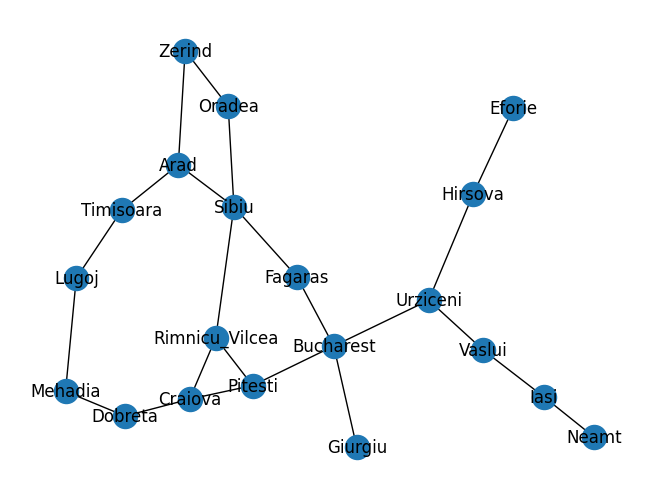

In [ ]:
# Plotando para conferir
nx.draw(G_inicial, with_labels=True)

In [ ]:
# Caso as cidades possuam as coordenadas de latitude e longitude
# a heurística poderá ser calculada através da distância euclidiana.
# Porém, para simplificar o exercício, é fornecida uma tabela
# (um dicionário)  com os valores das estimativas de distâncias.


# Estimativa das distâncias de todas as cidades com destino
# para Bucharest

# No futuro, a funcao abaixo será substituída apropriadamente
# para os cálculos das estimativas euclidianas

Estimation = {
        "Arad": 366,
        "Bucharest": 0,
        "Craiova": 160,
        "Dobreta": 242,
        "Eforie": 161,
        "Fagaras": 178,
        "Giurgiu": 77,
        "Hirsova": 151,
        "Iasi": 226,
        "Lugoj": 244,
        "Mehadia": 241,
        "Neamt": 234,
        "Oradea": 380,
        "Pitesti": 98,
        "Rimnicu_Vilcea": 193,
        "Sibiu": 253,
        "Timisoara": 329,
        "Urziceni": 80,
        "Vaslui": 199,
        "Zerind": 374
}

## Funções auxiliares

### Cálculo do custo do caminho

In [ ]:
# Calcula custo total de um caminho
def calcula_custo_caminho(G, caminho):
    custo = 0.0
    for i in range(len(caminho)-1):
        u, v = caminho[i], caminho[i+1]
        custo += G[u][v]['weight']
    return custo

### Cálculo custo do nó origem até o nó atual: custo g(n)


In [ ]:
# calcula custo acumulado do caminho da cidade origem até a cidade atual
def calcula_custo_g(G, caminho_origem_atual):
    return calcula_custo_caminho(G, caminho_origem_atual)

### Estimativa do custo do nó atual para o destino: custo h(n)


In [ ]:
# No futuro, a funcao abaixo será substituída apropriadamente
# para os cálculos das estimativas euclidianas
def estima_custo_h(cidade_atual):
    # destino == 'Bucharest':
    return Estimation[cidade_atual]

In [ ]:
# Exemplo
estima_custo_h('Zerind')

374

## Algoritmo BFS

In [ ]:
# Implementação do algoritmo BFS

In [ ]:
def BFS(G_inicial, s):

    G = G_inicial.copy()

    # INICIALIZACAO
    for v in G.nodes() - {s}:
        G.nodes[v]['cor'] = 'branco'
        G.nodes[v]['dis'] = np.inf

    G.nodes[s]['cor'] = 'cinza'
    G.nodes[s]['dis'] = 0

    # Fila (append (right), popleft)
    Q = deque()
    Q.append(s)
    while len(Q) != 0:
        u = Q.popleft()

        for v in G.neighbors(u):
            if G.nodes[v]['cor'] == 'branco':
                G.nodes[v]['cor'] = 'cinza'
                G.nodes[v]['dis'] = G.nodes[u]['dis'] + 1
                G.nodes[v]['pre'] = u

                Q.append(v)

        G.nodes[u]['cor'] = 'preto'

        #print(u, G.nodes[u]['dis'], G.nodes[u]['cor'])

    # Grafo G retornado contem as informações de distância
    # e cores desde o nó origem a todos os demais nós
    return G

#----------------------------------------------------------------

def caminho_minimo_BFS(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L

In [ ]:
def DFS(G_inicial, s):

    G = G_inicial.copy()

    # INICIALIZACAO
    for v in G.nodes() - {s}:
        G.nodes[v]['cor'] = 'branco'
        G.nodes[v]['dis'] = np.inf

    G.nodes[s]['cor'] = 'cinza'
    G.nodes[s]['dis'] = 0

    # Fila (append (right), popleft)
    Q = deque()
    Q.append(s)
    while len(Q) != 0:
        u = Q.pop()

        for v in G.neighbors(u):
            if G.nodes[v]['cor'] == 'branco':
                G.nodes[v]['cor'] = 'cinza'
                G.nodes[v]['dis'] = G.nodes[u]['dis'] + 1
                G.nodes[v]['pre'] = u

                Q.append(v)

        G.nodes[u]['cor'] = 'preto'

        #print(u, G.nodes[u]['dis'], G.nodes[u]['cor'])

    # Grafo G retornado contem as informações de distância
    # e cores desde o nó origem a todos os demais nós
    return G

#----------------------------------------------------------------

def caminho_minimo_DFS(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L

## Algoritmo UCS (Custo Uniforme)

In [ ]:
# Implemente aqui o algoritmo UCS (Custo Uniforme)
# f(n) = g(n)

In [ ]:
def UCS(G_inicial, s):

    G = G_inicial.copy()

    # INICIALIZACAO
    for v in G.nodes() - {s}:
        G.nodes[v]['cor'] = 'branco'
        G.nodes[v]['dis'] = np.inf

    G.nodes[s]['cor'] = 'cinza'
    G.nodes[s]['dis'] = 0

    # Fila (append (right), popleft)
    Q = deque()
    Q.append((s,0)) #precisamos do nó e do peso, o nó raiz tem peso 0
    while len(Q) != 0:
        u, peso_u = Q.popleft()

        for v in G.neighbors(u):
            peso_aresta = G[u][v]['weight']
            g = peso_u + peso_aresta  # funcao que estima o peso entre o nó inicial e o atual
            custo = g   # custo total
            # se o no ainda nao foi visitado ou se existe um custo menor ao anterior, calcula novamente
            if G.nodes[v]['cor'] == 'branco' or G.nodes[v]['dis'] > custo:
                G.nodes[v]['cor'] = 'cinza'
                G.nodes[v]['dis'] = custo
                G.nodes[v]['pre'] = u
                novaTupla = (v,custo) #precisamos verificar se o valor ja existe no deque e remover, e inserir o novo valor ordenado

                # remove_tupla(Q,novaTupla)
                inserir_ordenado(Q,novaTupla)
        print(Q)
        G.nodes[u]['cor'] = 'preto'

        #print(u, G.nodes[u]['dis'], G.nodes[u]['cor'])

    # Grafo G retornado contem as informações de distância
    # e cores desde o nó origem a todos os demais nós
    return G

#----------------------------------------------------------------
def inserir_ordenado(deque, tupla):
    print("Deque atual: ", deque)
    print("Tupla pra inserir: ", tupla)
    for i, item in enumerate(deque):
        if item[0] == tupla[0]:
            print("Removeu: ", deque[i])
            deque.remove(deque[i])
        if item[1] > tupla[1]:
            deque.insert(i, tupla)
            print("Inserido: ", deque)
            return
    deque.append(tupla)

# def remove_tupla(deque, tupla):
#     for i, item in enumerate(deque):
#         if item[0] == tupla[0]:
#             deque.remove(deque[i])
#             return

def caminho_minimo_UCS(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L

## Algoritmo A-star

In [ ]:
# Implemente aqui o algoritmo A-star
# f(n) = g(n) + h(n)

In [ ]:
def AStar(G_inicial, s):

    G = G_inicial.copy()

    # INICIALIZACAO
    for v in G.nodes() - {s}:
        G.nodes[v]['cor'] = 'branco'
        G.nodes[v]['dis'] = np.inf

    G.nodes[s]['cor'] = 'cinza'
    G.nodes[s]['dis'] = 0

    # Fila (append (right), popleft)
    Q = deque()
    estimativa_raiz = estima_custo_h(s)
    Q.append((s,0,estimativa_raiz)) #precisamos do nó, do peso e da estimativa até o final, o nó raiz tem peso 0
    while len(Q) != 0:
        u, peso_u, estimativa_u = Q.popleft()

        for v in G.neighbors(u):
            peso_aresta = G[u][v]['weight']
            g = peso_u + peso_aresta  # funcao que estima o peso entre o nó inicial e o atual
            h = estima_custo_h(v)
            custo = g + h  # custo total
            # se o no ainda nao foi visitado ou se existe um custo menor ao anterior, calcula novamente
            if G.nodes[v]['cor'] == 'branco' or G.nodes[v]['dis'] > custo:
                G.nodes[v]['cor'] = 'cinza'
                G.nodes[v]['dis'] = custo
                G.nodes[v]['pre'] = u
                #a nova tupla é formada pelo no, o custo real até o momento, e o custo total estimado até o final
                novaTupla = (v,g,custo) #precisamos verificar se o valor ja existe no deque e remover, e inserir o novo valor ordenado

                # remove_tupla(Q,novaTupla)
                inserir_ordenado(Q,novaTupla)
        print(Q)
        G.nodes[u]['cor'] = 'preto'

        #print(u, G.nodes[u]['dis'], G.nodes[u]['cor'])

    # Grafo G retornado contem as informações de distância
    # e cores desde o nó origem a todos os demais nós
    return G

#----------------------------------------------------------------
def inserir_ordenado(deque, tupla):
    # print("Deque atual: ", deque)
    # print("Tupla pra inserir: ", tupla)
    for i, item in enumerate(deque):
        if item[0] == tupla[0]:
            # print("Removeu: ", deque[i])
            deque.remove(deque[i])
        if item[1] > tupla[1]:
            deque.insert(i, tupla)
            # print("Inserido: ", deque)
            return
    deque.append(tupla)

# def remove_tupla(deque, tupla):
#     for i, item in enumerate(deque):
#         if item[0] == tupla[0]:
#             deque.remove(deque[i])
#             return

def caminho_minimo_AStar(G, s, t):

    L = [t]
    u = t
    while u != s:
        u = G.nodes[u]['pre']
        L.append(u)

    L.reverse()

    return L

## Programa Principal

### Inicializações

In [ ]:
origem = 'Arad'
destino = 'Bucharest'

In [ ]:
# BFS
G = BFS(G_inicial, origem)
caminho = caminho_minimo_BFS(G, origem, destino)

custo = calcula_custo_caminho(G, caminho)

print(f'Custo: {custo}\t->\tCaminho: {caminho}')

Custo: 450.0	->	Caminho: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']


In [ ]:
# DFS
G_dfs = DFS(G_inicial, origem)
caminho_dfs = caminho_minimo_BFS(G_dfs, origem, destino)

custo_dfs = calcula_custo_caminho(G_dfs, caminho_dfs)

print(f'Custo: {custo_dfs}\t->\tCaminho: {caminho_dfs}')

Custo: 733.0	->	Caminho: ['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Dobreta', 'Craiova', 'Pitesti', 'Bucharest']


In [ ]:
# Chame aqui apropriadamente os algoritmos para resolver o problema

In [ ]:
# UCS
G_ucs = UCS(G_inicial, origem)
caminho_ucs = caminho_minimo_BFS(G_ucs, origem, destino)

custo_ucs = calcula_custo_caminho(G_ucs, caminho_ucs)

print(f'Custo: {custo_ucs}\t->\tCaminho: {caminho_ucs}')

Deque atual:  deque([])
Tupla pra inserir:  ('Sibiu', 140)
Deque atual:  deque([('Sibiu', 140)])
Tupla pra inserir:  ('Timisoara', 118)
Inserido:  deque([('Timisoara', 118), ('Sibiu', 140)])
Deque atual:  deque([('Timisoara', 118), ('Sibiu', 140)])
Tupla pra inserir:  ('Zerind', 75)
Inserido:  deque([('Zerind', 75), ('Timisoara', 118), ('Sibiu', 140)])
deque([('Zerind', 75), ('Timisoara', 118), ('Sibiu', 140)])
Deque atual:  deque([('Timisoara', 118), ('Sibiu', 140)])
Tupla pra inserir:  ('Oradea', 146)
deque([('Timisoara', 118), ('Sibiu', 140), ('Oradea', 146)])
Deque atual:  deque([('Sibiu', 140), ('Oradea', 146)])
Tupla pra inserir:  ('Lugoj', 229)
deque([('Sibiu', 140), ('Oradea', 146), ('Lugoj', 229)])
Deque atual:  deque([('Oradea', 146), ('Lugoj', 229)])
Tupla pra inserir:  ('Fagaras', 239)
Deque atual:  deque([('Oradea', 146), ('Lugoj', 229), ('Fagaras', 239)])
Tupla pra inserir:  ('Rimnicu_Vilcea', 220)
Inserido:  deque([('Oradea', 146), ('Rimnicu_Vilcea', 220), ('Lugoj', 229)

In [ ]:
G_inicial['Arad']['Sibiu']['weight']

140

In [ ]:
# A-star
G_AStar = AStar(G_inicial, origem)
caminho_AStar = caminho_minimo_BFS(G_AStar, origem, destino)

custo_AStar = calcula_custo_caminho(G_AStar, caminho_AStar)

print(f'Custo: {custo_AStar}\t->\tCaminho: {caminho_AStar}')

Deque atual:  deque([])
Tupla pra inserir:  ('Sibiu', 140, 393)
Deque atual:  deque([('Sibiu', 140, 393)])
Tupla pra inserir:  ('Timisoara', 118, 447)
Inserido:  deque([('Timisoara', 118, 447), ('Sibiu', 140, 393)])
Deque atual:  deque([('Timisoara', 118, 447), ('Sibiu', 140, 393)])
Tupla pra inserir:  ('Zerind', 75, 449)
Inserido:  deque([('Zerind', 75, 449), ('Timisoara', 118, 447), ('Sibiu', 140, 393)])
deque([('Zerind', 75, 449), ('Timisoara', 118, 447), ('Sibiu', 140, 393)])
Deque atual:  deque([('Timisoara', 118, 447), ('Sibiu', 140, 393)])
Tupla pra inserir:  ('Oradea', 146, 526)
deque([('Timisoara', 118, 447), ('Sibiu', 140, 393), ('Oradea', 146, 526)])
Deque atual:  deque([('Sibiu', 140, 393), ('Oradea', 146, 526)])
Tupla pra inserir:  ('Lugoj', 229, 473)
deque([('Sibiu', 140, 393), ('Oradea', 146, 526), ('Lugoj', 229, 473)])
Deque atual:  deque([('Oradea', 146, 526), ('Lugoj', 229, 473)])
Tupla pra inserir:  ('Fagaras', 239, 417)
Deque atual:  deque([('Oradea', 146, 526), ('L